In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt

DATASET_FILE = "dataset"
TILE_SIZE = 0.01
THRESHOLD = 20
# No of data points used
POINTS_COUNT = 500

In [8]:
class Person:
    def __init__(self, id):
        self.id = id
        self.interestPoint = {}
        self.rawData = []

    def addRawData(self, rawData):
        # self.rawData.append(rawData)
        tile = int(rawData["longitude"] / TILE_SIZE), int(rawData["latitude"] / TILE_SIZE)
        if tile not in self.interestPoint:
            self.interestPoint[tile] = 1
        else:
            self.interestPoint[tile] += 1

    def filterByThreshold(self):
        for key in self.interestPoint:
            if self.interestPoint[key] < THRESHOLD:
                self.interestPoint[key] = 0

    def __str__(self):
        return f"user {self.id}"

In [9]:
def isNewUser(id, users):
    for user in users:
        if user.id == id:
            return False
    return True


In [10]:
Users = []

with open(DATASET_FILE, 'r', newline="") as file:
    reader = csv.reader(file, delimiter="	")
    for row in reader:
        # is new User
        id = int(row[0])
        if isNewUser(id, Users, ):
            mUser = Person(id)
            Users.append(mUser)
        else:
            mUser = [user for user in Users if user.id == id][0]
        mUser.addRawData({
            "timestamp": int(row[1]),
            "longitude": float(row[2]),
            "latitude": float(row[3]),
        })

In [12]:
for user in Users:
    user.filterByThreshold()

In [18]:
totalLength = 0
interest_users = []
for user in Users:
    totalLength += len(user.interestPoint)
    interest_users.append(len([count for count in user.interestPoint if count != 0]))

In [19]:
USERS_COUNT = len(Users)
x = np.sort(interest_users)
y = np.arange(USERS_COUNT) / float(USERS_COUNT)

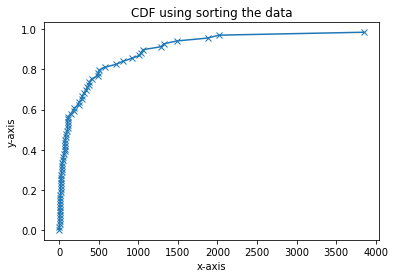

In [20]:
# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.title('CDF using sorting the data')

plt.plot(x, y, marker='x')
